#**Sprint**
Previamente a responder las preguntas del sprint, se importa el dataset con el que se va a trabajar y se realiza un pequeña inspección inicial de algunos valores, el tipo de datos o el número de elementos únicos por cada columna.

In [32]:
# Importación de librerías
import numpy as np
import pandas as pd

# Librerías para hacer gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

In [33]:
# Carga del fichero de datos
file = '/content/Sprint/ASI_casoPractico.csv'
data = pd.read_csv(file, sep = ';')
data.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,2.4,0,0,0,0,64,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,10.4,2,0,0,0,130,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,13.4,2,0,0,0,130,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,23.0,2,0,0,0,117,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,19.9,0,0,0,0,117,53,170,9,0,137,136,138,11,1,0


In [34]:
# Información del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2126 non-null   int64  
 1   b         2126 non-null   int64  
 2   e         2126 non-null   int64  
 3   LBE       2126 non-null   int64  
 4   AC        2126 non-null   int64  
 5   FM        2126 non-null   int64  
 6   UC        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   int64  
 12  DS        2126 non-null   int64  
 13  DP        2126 non-null   int64  
 14  DR        2126 non-null   int64  
 15  Width     2126 non-null   int64  
 16  Min       2126 non-null   int64  
 17  Max       2126 non-null   int64  
 18  Nmax      2126 non-null   int64  
 19  Nzeros    2126 non-null   int64  
 20  Mode      2126 non-null   int6

In [35]:
data.agg(['nunique']).T

,nunique
ID,2126
b,979
e,1064
LBE,48
AC,22
FM,96
UC,19
ASTV,75
MSTV,57
ALTV,87


#**1.Clasifique cada variable según su tipo, cualitativa o cuantitativa discreta o continúa.**

Las definiciones de cada tipo de variable:
- Cualitativas: Aquellas que representan cualidades o características categóricas, es decir no toman valores numéricos.
- Cuantitativas: Aquellas que cuantifican, es decir, toman valores numéricos:
 - Discretas: Tienen como resultado un numero contable de valores (Ej: Numero de hijos de una familia, numero de coches que tienes...)
 - Continuas: Pueden tomar cualquier valor dentro de un intervalo y suelen ser características medibles (Ej: Temperatura, altura de una persona...)

In [36]:
nombre_columnas      = data.columns.tolist()
significado_columnas = ['Identification','Start Instant','End Instant','Baseline Value','Accelerations','Foetal Movement','Uterine Contractions','Percentage of time with abnormal short term variability','Mean value of short term variability','Percentage of time with abnormal long term variability','Mean value of long term variability','Light Decelerations','Severe Decelerations','Prolongued Decelerations','Repetitive Decelerations',' Histogram Width','Low freq. of the histogram','High freq. of the histogram','Number of histogram peaks','Number of histogram zeros','Histogram Mode','Histogram Mean','Histogram Median','Histogram variance','Histogram tendency','Target']
columnas             = dict(zip(nombre_columnas, significado_columnas))

Antes de clasificar las variables se recopilan todas ellas y se les dota de una pequeña descripción:

In [37]:
columnas

{'AC': 'Accelerations',
 'ALTV': 'Percentage of time with abnormal long term variability',
 'ASTV': 'Percentage of time with abnormal short term variability',
 'DL': 'Light Decelerations',
 'DP': 'Prolongued Decelerations',
 'DR': 'Repetitive Decelerations',
 'DS': 'Severe Decelerations',
 'FM': 'Foetal Movement',
 'ID': 'Identification',
 'LBE': 'Baseline Value',
 'MLTV': 'Mean value of long term variability',
 'MSTV': 'Mean value of short term variability',
 'Max': 'High freq. of the histogram',
 'Mean': 'Histogram Mean',
 'Median': 'Histogram Median',
 'Min': 'Low freq. of the histogram',
 'Mode': 'Histogram Mode',
 'Nmax': 'Number of histogram peaks',
 'Nzeros': 'Number of histogram zeros',
 'Target': 'Target',
 'Tendency': 'Histogram tendency',
 'UC': 'Uterine Contractions',
 'Variance': 'Histogram variance',
 'Width': ' Histogram Width',
 'b': 'Start Instant',
 'e': 'End Instant'}

A partir del `data.info()` realizado al inicio, ya podemos concluir que todas las variables son cuantitativas, pues todas son de tipo numérico. Ahora, en base a la pequeña descripción de cada variable, y por ejemplo, el número de elementos únicos para cada una de ellas que se obtuvo al inicio, se van a clasificar las variables en continuas y discretas.
- Cuantitativa Continua = CC
- Cuantitativa Discreta = CD

In [38]:
tipo_variables = ['CD','CC','CC','CC','CD','CD','CD','CC','CC','CC','CC','CD','CD','CD','CD','CC','CC','CC','CD','CD','CC','CC','CC','CC','CD','CD']
tipo_variables = dict(zip(nombre_columnas,tipo_variables))

In [39]:
tipo_variables

{'AC': 'CD',
 'ALTV': 'CC',
 'ASTV': 'CC',
 'DL': 'CD',
 'DP': 'CD',
 'DR': 'CD',
 'DS': 'CD',
 'FM': 'CD',
 'ID': 'CD',
 'LBE': 'CC',
 'MLTV': 'CC',
 'MSTV': 'CC',
 'Max': 'CC',
 'Mean': 'CC',
 'Median': 'CC',
 'Min': 'CC',
 'Mode': 'CC',
 'Nmax': 'CD',
 'Nzeros': 'CD',
 'Target': 'CD',
 'Tendency': 'CD',
 'UC': 'CD',
 'Variance': 'CC',
 'Width': 'CC',
 'b': 'CC',
 'e': 'CC'}

#**2. ¿Cuál es la proporción de estados fetales normales?¿Y anormales?**

Mediante `matplotlib.pyplot.pie(x,..,labels=..,autopct=...)` se realiza un gráfico de tarta del vector x, en donde el área de cada porción viene dada por $x/sum(x)$. Con "labels" proporcionamos las etiquetas para cada porción y con autopct habilitamos que en cada una de ellas aparezca su porcentaje con respecto al gráfico.  
Como lista x pasamos aquella que contiene el total de estados normales y anormales como sus dos elementos.

0    1655
1     471
Name: Target, dtype: int64


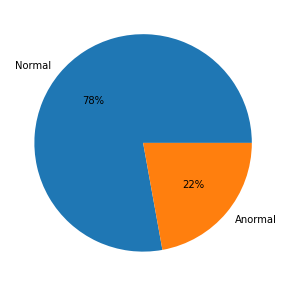

In [40]:
a, b = data['Target'].value_counts()
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.pie([a, b], labels=["Normal", "Anormal"], autopct="%1.0f%%")
print(data["Target"].value_counts())

#**3. Obtenga las medidas de centralización, localización y dispersión para las variables:  FM, ALTV y Median.**

Se va a emplear `pandas.Dataframe.describe()` que genera una serie de estadisticas descriptivas, incluyendo medidas de centralización como la media y la mediana ($=P_{50}$), de localización como los percentiles 25, 50 y 75, y de dispersión como la desviación estándar, el máximo y el mínimo. Recoge prácticamente todas las estadísticas descriptivas fundamentales. 

In [41]:
FM_statistics     = data.FM.describe().T
ALTV_statistics   = data.ALTV.describe().T
Median_statistics = data.Median.describe().T

In [42]:
FM_statistics

count    2126.000000
mean        7.241298
std        37.125309
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       564.000000
Name: FM, dtype: float64

Llama la atención la gran dispersión en los datos, con una valor muy grande para la desviación estándar ($\approx 5·\mu$), y un gran tamaño de rango ($max-min$), lo que junto a los percentiles, nos habla de la presencia datos extremos, pues el 75% de los datos tienen un valor inferior a 2. Es una característica de gran variabilidad. 

In [43]:
ALTV_statistics

count    2126.00000
mean        9.84666
std        18.39688
min         0.00000
25%         0.00000
50%         0.00000
75%        11.00000
max        91.00000
Name: ALTV, dtype: float64

Para ALTV se tiene un comportamiento similar aunque con una menor dispersión.

In [44]:
Median_statistics

count    2126.000000
mean      138.090310
std        14.466589
min        77.000000
25%       129.000000
50%       139.000000
75%       148.000000
max       186.000000
Name: Median, dtype: float64

Para "Median" el comportamiento es radicalmente opuesto a los dos casos anteriores presentando el conjunto una localización mucho mayor. De hecho, empleando como criterio para determinar los valores atípicos que lo son aquellos que no están en el intervalo $[Q_{1}-1.5RIQ, Q_{3}+1.5RIQ]$, incluso el máximo y mínimo, aún siendo atípicos, están bastante próximos a este intervalo.

#**4. Obtenga el histograma para las variables: LBE, DS y Min.**



Mediante el histograma se puede ver como se distribuye la población en función de una característica, en este caso LBE, DS y Min.

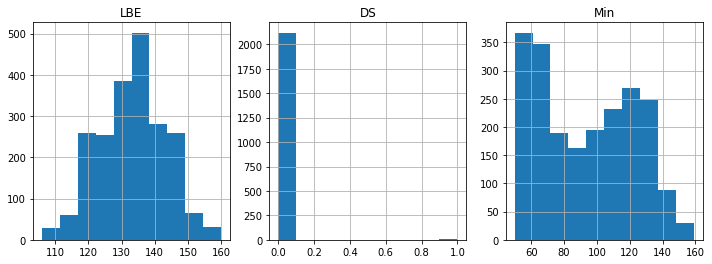

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=False)
data['LBE'].hist(ax=axs[0]).set_title('LBE')
data['DS'].hist(ax=axs[1]).set_title('DS')
data['Min'].hist(ax=axs[2]).set_title('Min')
plt.show()

Podemos extraer conclusiones interesantes a partir de estos histogramas:
- LBE: Es la característica con una distribución más uniforme, que incluso podría modelizarse como una gaussiana.
- DS: Es una variable dicotómica, que solo toma dos valores, y uno de ellos con muchisima más frecuencia que el otro. Va a aportar muy poca información a nuestro conjunto.
- Min: Una variable con una distribución más compleja que las dos anteriores.

#**5. Obtenga un gráfico box-plot para las variables: AC, ASTV y Mean.** 

Mediante `pandas.Dataframe.boxplot` se construye una gráfica de caja (boxplot) para las variables AC, ASTV Y Mean. El gráfico de cajas permite representar gráficamente los datos a través de sus cuartiles. La caja se extiende desde el primer al tercer cuartil y la línea que lo cruza se corresponde con el segundo cuartil o mediana.
También muestra los datos atípicos, es decir, áquellos que están fuera del intervalo representado por las líneas que salen de la caja y de valor:

\begin{align}
[Q_{1}-1.5·RIQ, &Q_{3}+1.5·RIQ];\\
RIQ = &Q_{3}-Q_{1}
\end{align}

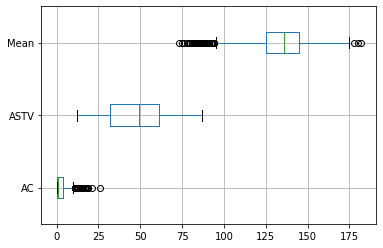

In [46]:
data.boxplot(column=['AC','ASTV','Mean'],vert=False)

Es llamativa la presencia de una gran cantidad de valores atípicos en Mean y AC, y de ninguno en ASTV. La variable AC parece ser una importante variable explicativa, pues el grueso de sus valores (interior de la caja) está poco disperso, sin embargo, presenta una importante cantidad de valores atípicos, que probablemente estén relacionados con el estado anormal del feto (menos frecuente). Así, cabe esperar que se trate de una variable que varíe fuertemente según cual sea el target. 